**OK, getting somewhere: centering should of course be done on the sample (sample mean), but doing so for the synthetic data hides the signal further - or said differently: for pure noise, things are already centered; adding a small signal has a small effect on the mean, but can be picked up nicely in the biplots; unfortunately, doing a proper recentering of the signal-containing noise will result in biplots with much less features. It might nevertheless still be possible to identify a signal there. TBD**

From observation, it'd seem that centering degrades the decomposition a little bit. Of course in practice, one does not know what is signal and what is noise, but if one did, the noise could be used to center, which would be a nice framework where the signal stands out even more, not only by its structure, but also by its average distance to the center of the noise.

In [1]:
%matplotlib inline
import numpy as np
import IsCAn as iscan

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


DATA is assumed to be (n_feature,n_sample), is it?  (200, 400)
DATA is loaded from  data/toto_80.npy
$ data.shape =  (200, 400)
> Retrieving sample mean and centering DATA on it
> Performing SVD
 


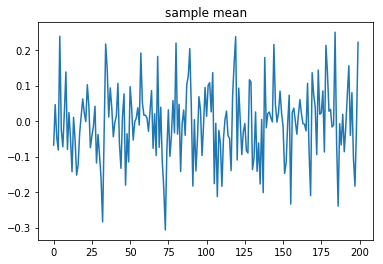

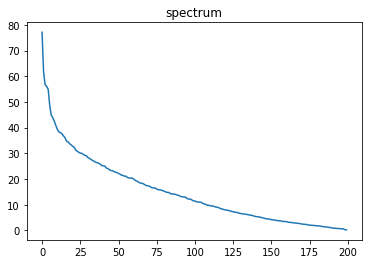

In [2]:
#filename = 'data/rnapolii_nick_traj.npy'
filename = 'data/toto_80.npy'
data_loaded = iscan.load(filename)
data= data_loaded
print(f"DATA is loaded from ",filename)
print("$ data.shape = ", data.shape)
sample_mean, data_centered = iscan.center(data)
iscan.plot(sample_mean,title='sample mean')
U,L,V = iscan.perform_svd(data_centered)
iscan.plot(L,title='spectrum')

! Deciding on truncating order:


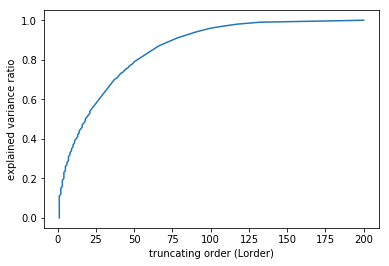

In [3]:
print(f"! Deciding on truncating order:")
iscan.plot_truncate_order(L,trange=np.arange(0,1.01,0.01))

In [4]:
Lorder=25
print(f"! Truncating the SVD components")
Ul,Ll,Vl = iscan.truncate_svd(U,L,V,Lorder)
print(f"... before truncating: rank(L) = ",iscan.get_rank(L,tol=0))
print(f"... after truncating:  rank(L) = ",iscan.get_rank(Ll,tol=0))

! Truncating the SVD components
... before truncating: rank(L) =  200
... after truncating:  rank(L) =  25


! Whitening the data
> Performing SVD
 


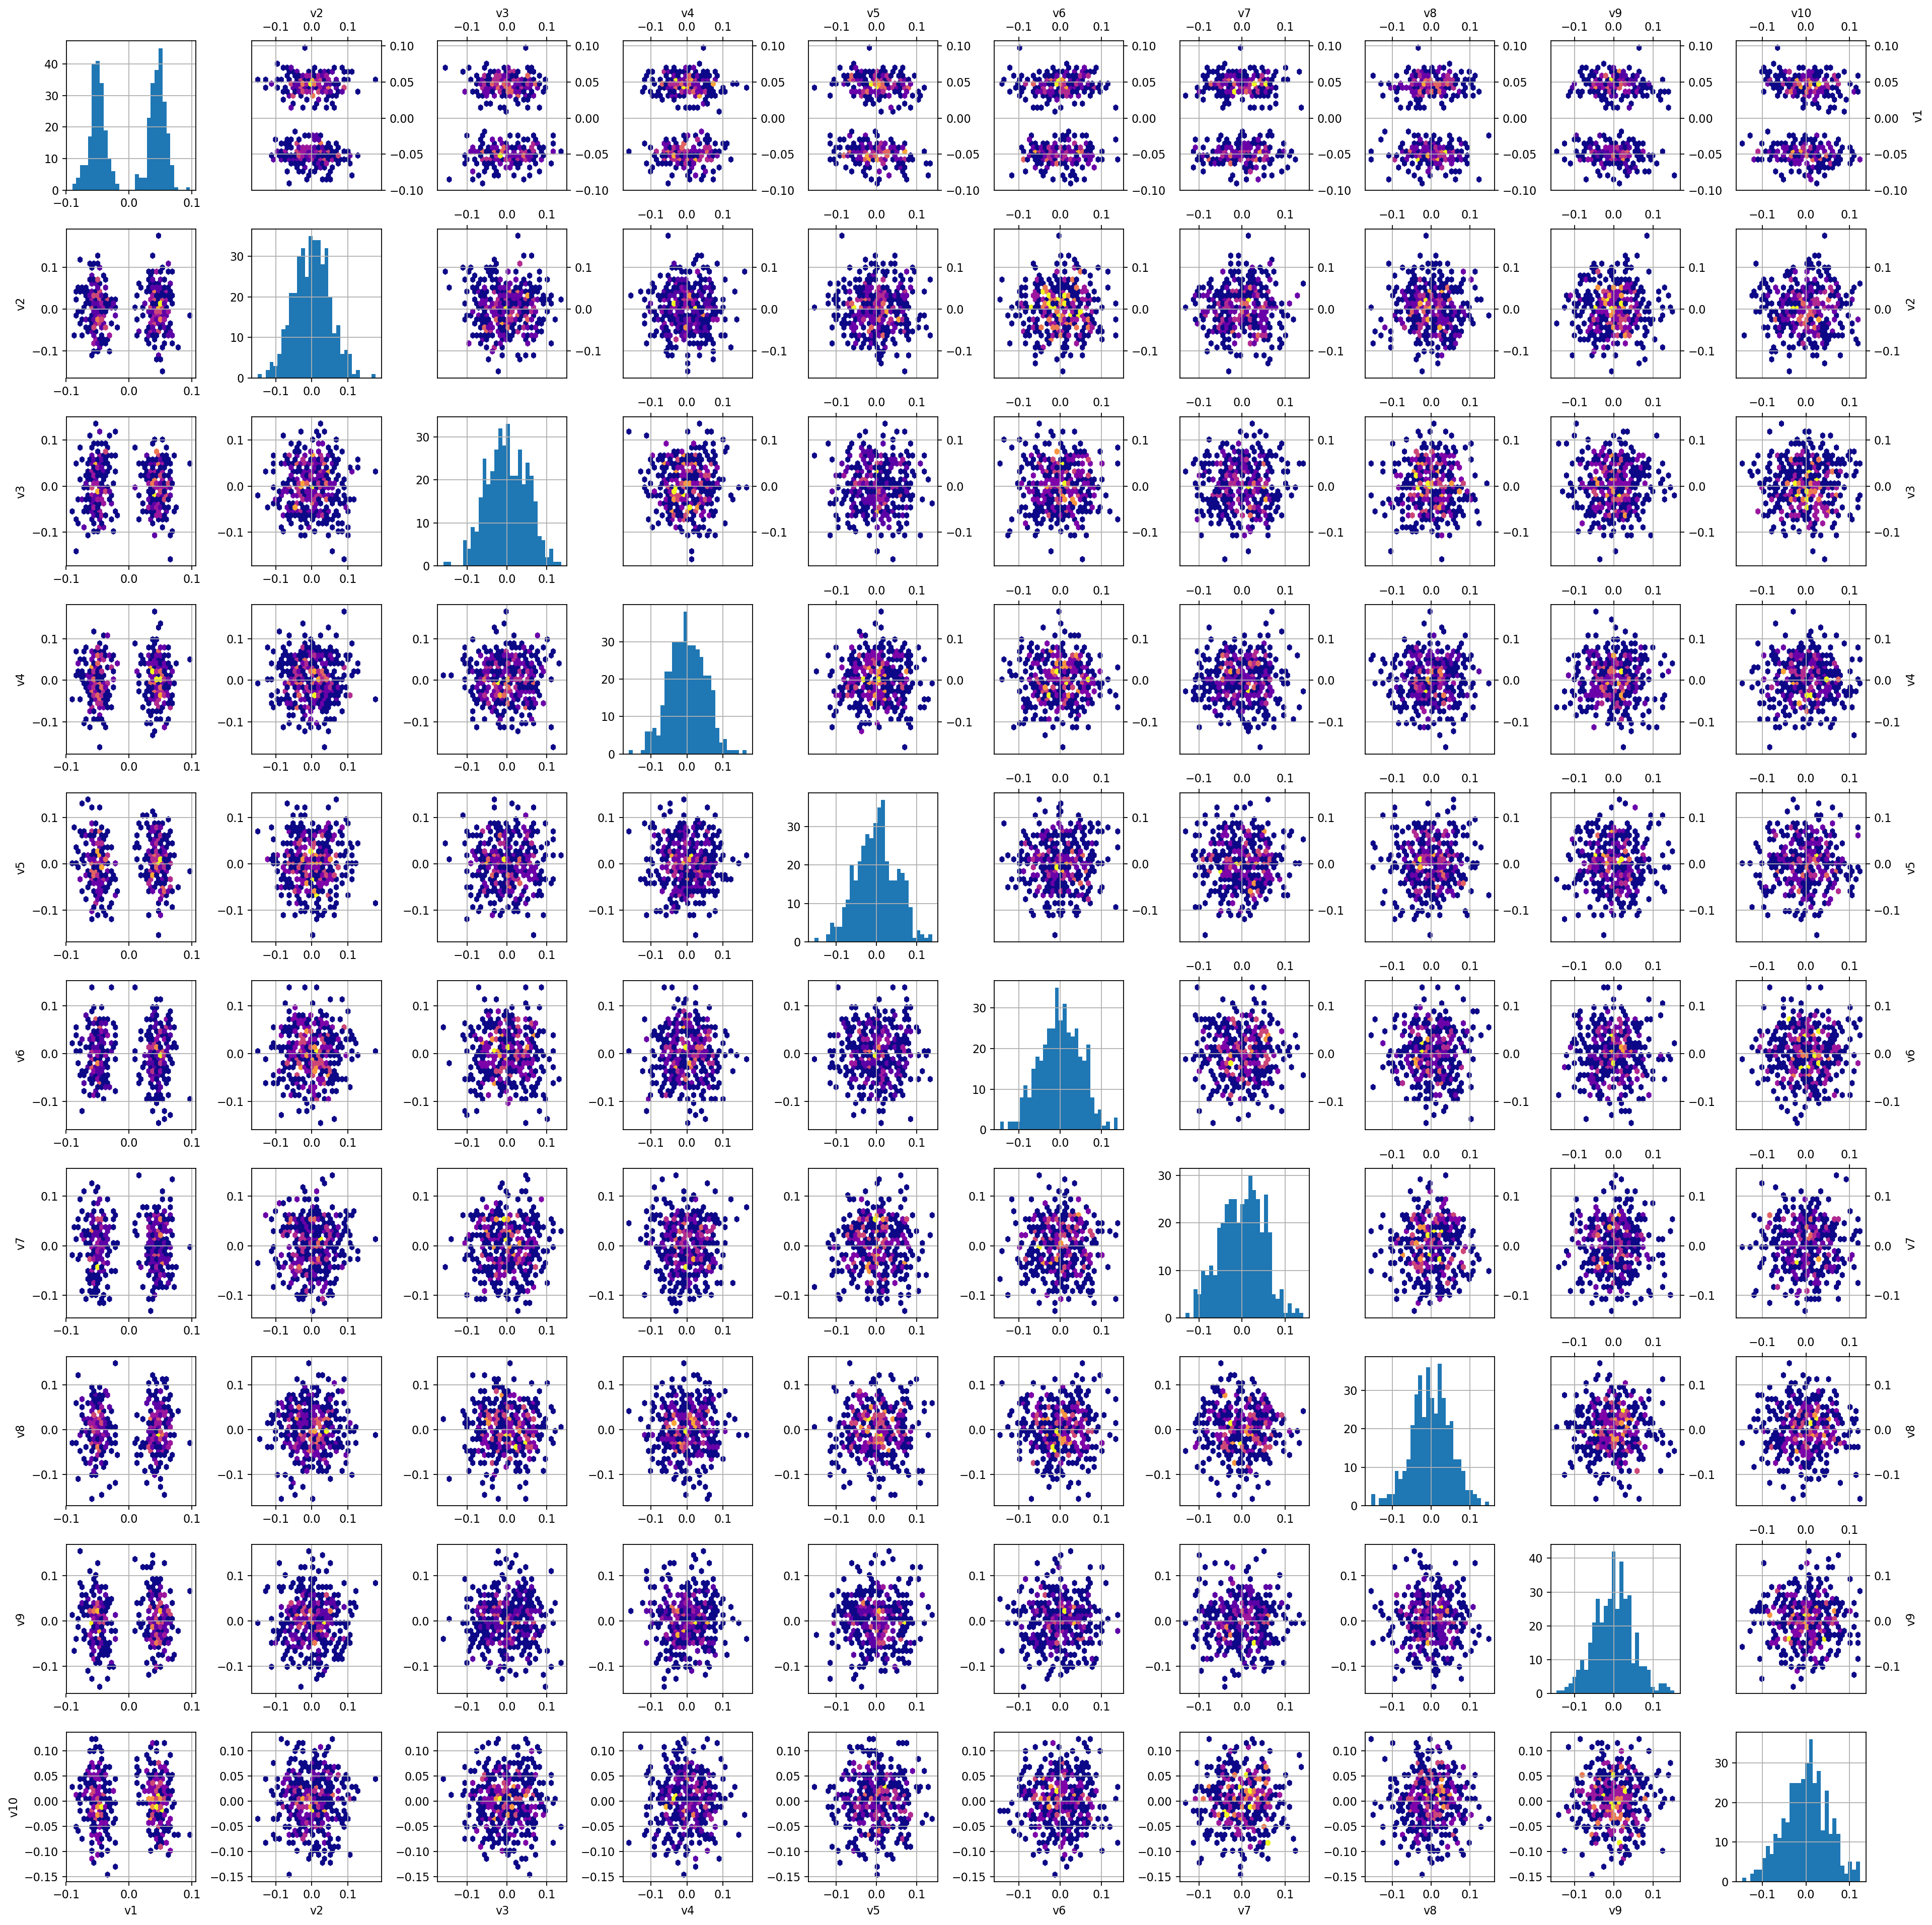

In [5]:
print(f"! Whitening the data")
data_whitened = iscan.whiten(data_centered,n=Lorder)
iscan.biplots(data_whitened,nbins=30,n=10,figsize=24)

In [6]:
ws, we, score = iscan.window_scan(data_whitened,Lorder=Lorder,window_size_max=10)

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [13]:
import numpy as np
scorarr = np.array(score)
scorarr.shape
score[0]

array([ 0.01561511])

In [ ]:
for i in np.arange(len(score)):
    if(np.max(score[i]) > 0.5):
        print(ws[i],we[i],np.max(scorarr[i,0]),np.max(scorarr[i,1]),np.max(scorarr[i,2]))